In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [564]:
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [565]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [566]:
columns = ['BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']
df = df.replace(0, pd.np.nan).dropna(subset=columns).fillna(0)

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_56982/2838399915.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = df.replace(0, pd.np.nan).dropna(subset=columns).fillna(0)


In [567]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43,1.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0


In [568]:
count = 0
for i in df['Outcome']:
    if i == 0:
        count+=1
print(count)

360


In [569]:
import numpy as np
from sklearn.model_selection import train_test_split
quant_cols_1 = df.drop('Outcome', axis=1)
Outcome = df['Outcome']

x_cols = df.columns[:(len(df.columns)-1)]
x_train, x_test, y_train, y_test = train_test_split(quant_cols_1, Outcome, test_size=0.3, random_state = 42)

x_train.iloc[:,0:-1] = x_train.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test.iloc[:,0:-1] = x_test.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)


In [570]:
from sklearn import decomposition
# trained points
pca = decomposition.PCA(n_components=2)
test_reduced = pca.fit_transform(x_train[x_cols])
pc0_trained = test_reduced[:, 0]
pc1_trained = test_reduced[:, 1]

In [571]:
# test points
test_data_reduced = pca.transform(x_test[x_cols])
pc0_test = test_data_reduced[:, 0]
pc1_test = test_data_reduced[:, 1]

In [572]:
pca_train = pd.DataFrame({'pc0':pc0_trained, 'pc1':pc1_trained,'Outcome': y_train}) 
pca_train.to_csv('pca_train.csv') 
pca_train = pd.read_csv('pca_train.csv')
pc0 = pca_train["pc0"]
pc1 = pca_train["pc1"]
Outcome = pca_train['Outcome']
c_0 = []
c_1 = []
o_0 = []
o_1 = []

for i in range (len(Outcome)):
    if Outcome[i] == 1:
        c_0.append(pc0[i])
        c_1.append(pc1[i])
    if Outcome[i] == 0:
        o_0.append(pc0[i])
        o_1.append(pc1[i])

pca_test = pd.DataFrame({'pc0':pc0_test, 'pc1':pc1_test,'Outcome': y_test})  
pc0_test = pca_test["pc0"]
pc1_test = pca_test["pc1"]
type_rice_test = pca_test['Outcome']

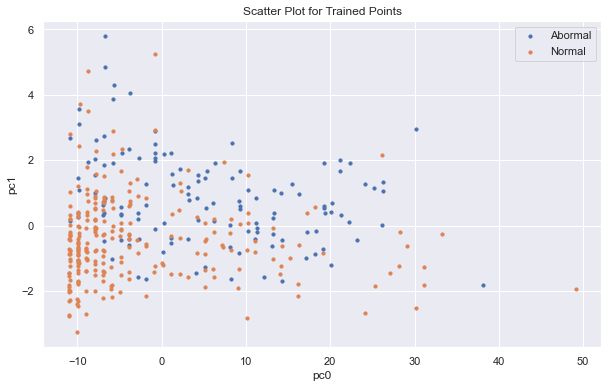

In [573]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(c_0, c_1, label = 'Abormal', s = 10)
plt.scatter(o_0, o_1, label = 'Normal', s = 10)
plt.xlabel("pc0")
plt.ylabel("pc1")
plt.legend()
plt.title("Scatter Plot for Trained Points")
plt.show()

In [574]:
#scaler=StandardScaler()
X=df.drop(columns=["Outcome"])
#X=scaler.fit_transform(X)
y = df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 42)


In [575]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
695,7.0,142.0,90.0,24.0,480.0,30.4,0.128,43
110,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24
492,4.0,99.0,68.0,38.0,0.0,32.8,0.145,33
130,4.0,173.0,70.0,14.0,168.0,29.7,0.361,33
652,5.0,123.0,74.0,40.0,77.0,34.1,0.269,28
...,...,...,...,...,...,...,...,...
139,5.0,105.0,72.0,29.0,325.0,36.9,0.159,28
462,8.0,74.0,70.0,40.0,49.0,35.3,0.705,39
260,3.0,191.0,68.0,15.0,130.0,30.9,0.299,34
470,1.0,144.0,82.0,40.0,0.0,41.3,0.607,28


In [576]:
pred2[0]

0.0

4
0.7237661056953941


Text(0, 0.5, 'F1 Score')

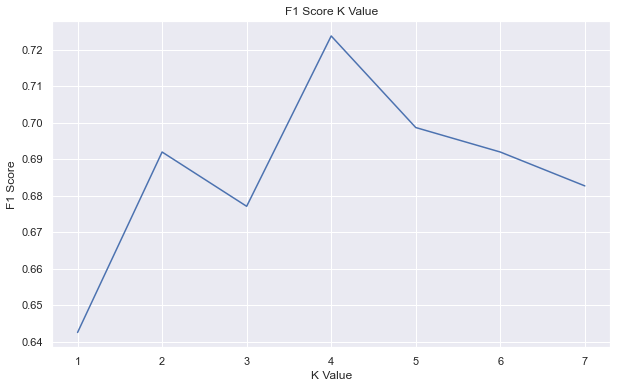

In [577]:
from sklearn.metrics import f1_score
f1s = []

# Calculating f1 score for K values between 1 and 15
for i in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

for i in range(len(f1s)):
    if f1s[i] == max(f1s):
        print(i+1)

print(max(f1s))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), f1s, markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Outcome                     1.000000
Glucose                     0.464195
Age                         0.321420
BMI                         0.305894
SkinThickness               0.259199
Pregnancies                 0.258883
DiabetesPedigreeFunction    0.226655
Insulin                     0.209954
BloodPressure               0.185618
Name: Outcome, dtype: float64

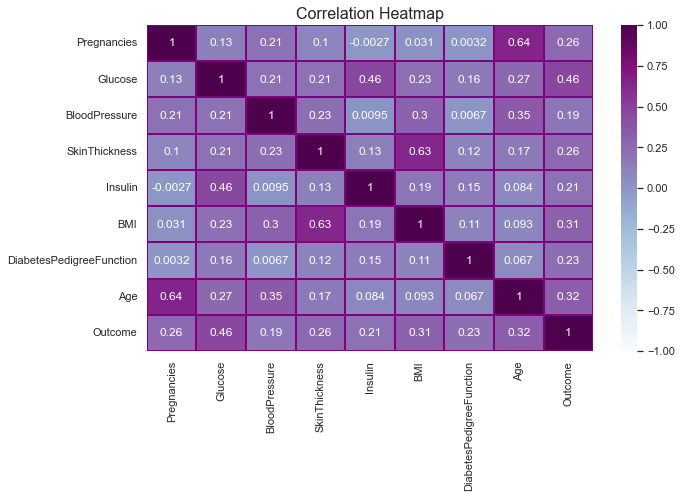

In [578]:
#correlation matrix

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), cmap = "BuPu", vmin=-1, vmax=1, annot=True, linewidth=2, linecolor="Purple")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16})
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending = False)

/Users/nickychen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

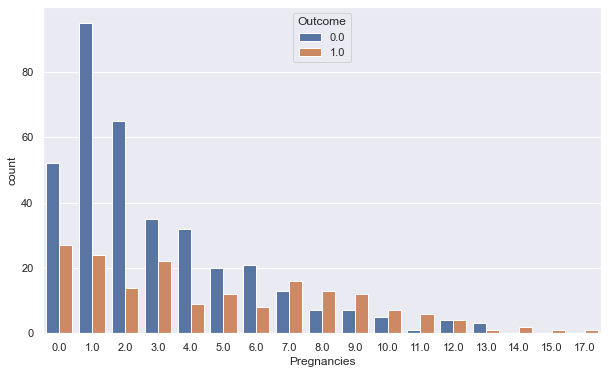

In [579]:
plt.figure(figsize=(10,6))
sns.countplot("Pregnancies",data=df,hue="Outcome")

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

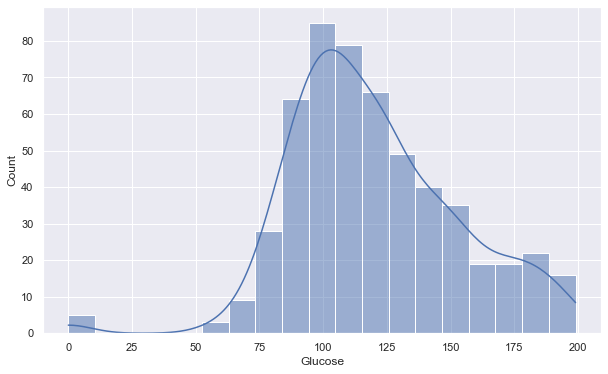

In [580]:
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=df, x="Glucose", kde=True)

/Users/nickychen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


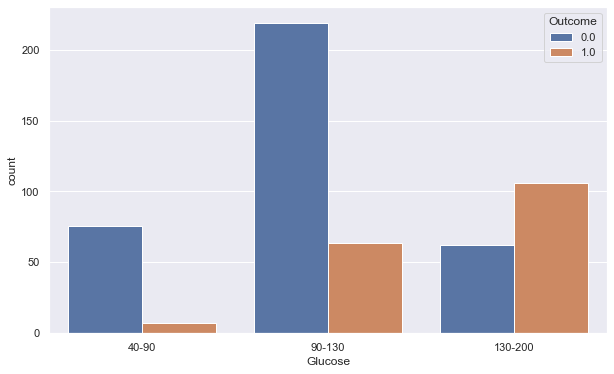

In [581]:
glucose_bins=pd.cut(df["Glucose"],bins=[40,90,130,200],labels=["40-90","90-130","130-200"])
plt.figure(figsize=(10,6))
sns.countplot(glucose_bins,hue=df["Outcome"])
plt.show()

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

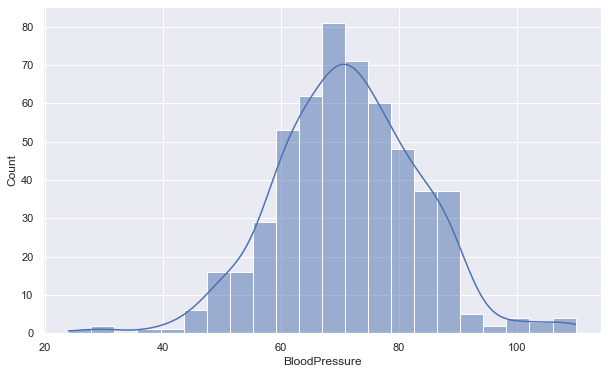

In [582]:
sns.histplot(data=df, x="BloodPressure", kde=True)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

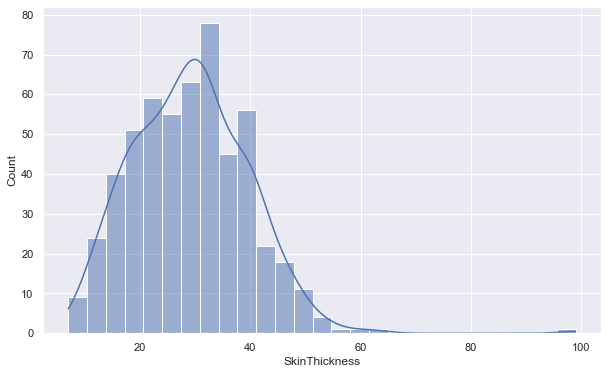

In [583]:
sns.histplot(data=df, x="SkinThickness", kde=True)


<AxesSubplot:xlabel='Insulin', ylabel='Count'>

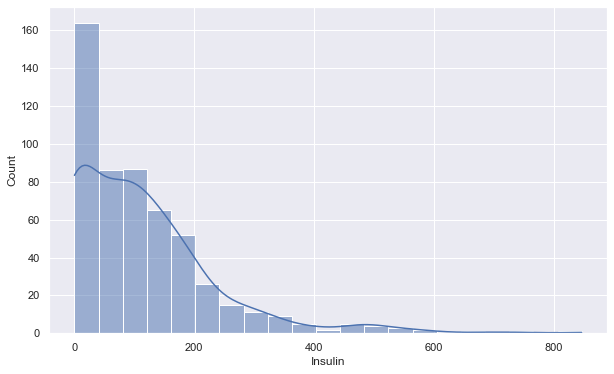

In [584]:
sns.histplot(data=df, x="Insulin", kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

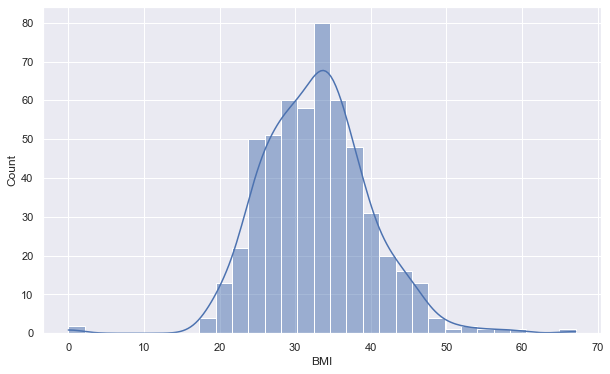

In [585]:
sns.histplot(data=df, x="BMI", kde=True)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

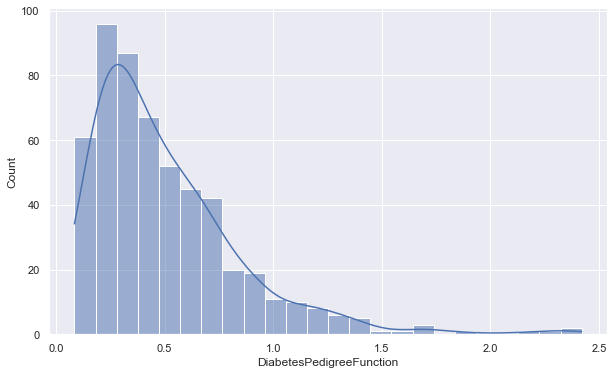

In [586]:
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

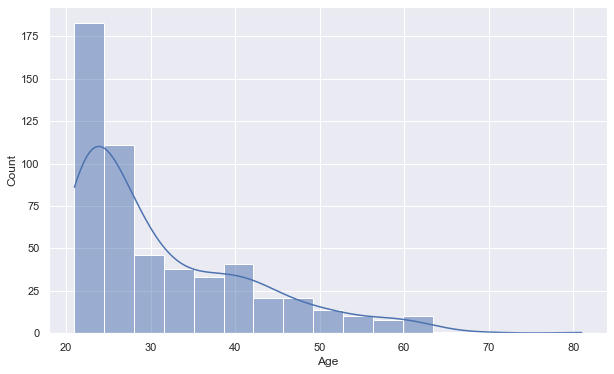

In [587]:
sns.histplot(data=df, x="Age", kde=True)

/Users/nickychen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


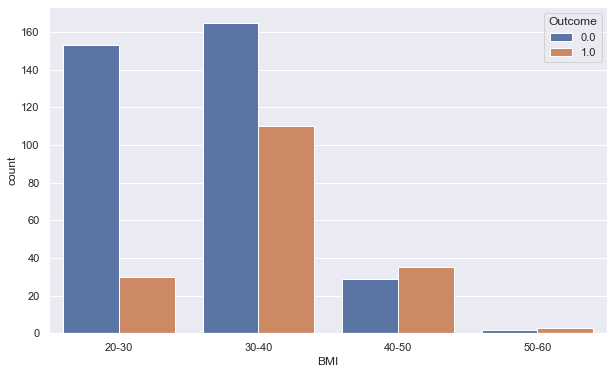

In [588]:
bmi_bins=pd.cut(df["BMI"],bins=[20,30,40,50,60],labels=["20-30","30-40","40-50","50-60"])
plt.figure(figsize=(10,6))
sns.countplot(bmi_bins,hue=df["Outcome"])
plt.show()

/Users/nickychen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


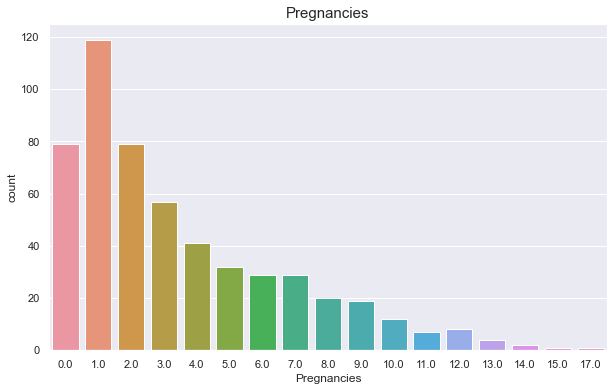

In [589]:
plt.figure(figsize=(10,6))
sns.countplot(df["Pregnancies"])
plt.title("Pregnancies", size=15)
plt.show()